**For SQL database integration and manipulation.**

**Import necessary libraries**

In [2]:
import pandas as pd #For data manipulation and analysis.
import matplotlib.pyplot as plt #For creating static visualizations.
import seaborn as sns #For statistical data visualization built on top of Matplotlib.
import numpy as np #For numerical operations, especially with arrays.
import warnings #To manage warning messages, specifically suppressing them in this case.
warnings.filterwarnings('ignore')


In [3]:
datafile = pd.read_csv(r"C:\Users\ritik\OneDrive\Desktop\Amazon data sales analysis\Amazon Sales data.csv")

In [5]:
datafile.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


**Head returns top 5 rows if not mentioned**

In [6]:
datafile.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


**Information of datafile (dataframe)**

In [7]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


**Knowing the shape of our dataframe (rows,columns)**

In [8]:
datafile.shape

(100, 14)

**Replacing order_priority values, making values more meaningful**

In [9]:
order_pri = {"H": "High","L":"Low","M":"Medium","C":"Critical"}
datafile["Order Priority"] = datafile["Order Priority"].replace(order_pri)

In [10]:
datafile.columns #Accessing the column names in the dataframe

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [49]:
datafile.columns = datafile.columns.str.lower()
datafile.columns = datafile.columns.str.replace(" ","_")
#Lowering the column names and adding underscores 

In [12]:
datafile #Returning the dataframe to check if column names changed

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,High,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,Critical,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,Low,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,Critical,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,Low,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,Medium,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,Low,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,Critical,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,Medium,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


**Finding NA(Not Available) values**

In [13]:
datafile.isna().sum()

region            0
country           0
item_type         0
sales_channel     0
order_priority    0
order_date        0
order_id          0
ship_date         0
units_sold        0
unit_price        0
unit_cost         0
total_revenue     0
total_cost        0
total_profit      0
dtype: int64

In [14]:
datafile.isna().sum()

region            0
country           0
item_type         0
sales_channel     0
order_priority    0
order_date        0
order_id          0
ship_date         0
units_sold        0
unit_price        0
unit_cost         0
total_revenue     0
total_cost        0
total_profit      0
dtype: int64

In [15]:
datafile['order_date'] = pd.to_datetime(datafile['order_date']) 
#Changing data type of column named order_date to date-time

In [16]:
datafile['ship_date'] = pd.to_datetime(datafile['ship_date'])
#Changing data type of column named ship_date to date-time (earlier datatype string)

In [17]:
datafile.describe(include='object')
#Gives descriptive statistics for all categorical (object-type) columns in the dataframe

,region,country,item_type,sales_channel,order_priority
count,100,100,100,100,100
unique,7,76,12,2,4
top,Sub-Saharan Africa,The Gambia,Cosmetics,Offline,High
freq,36,4,13,50,30


In [18]:
for column in datafile.describe(include='object').columns:
    print(column)
    print(datafile[column].unique())
    print("*"*50)
    #Iterating over all categorical columns in the dataframe, printing the name of each column, its unique values

region
['Australia and Oceania' 'Central America and the Caribbean' 'Europe'
 'Sub-Saharan Africa' 'Asia' 'Middle East and North Africa'
 'North America']
**************************************************
country
['Tuvalu' 'Grenada' 'Russia' 'Sao Tome and Principe' 'Rwanda'
 'Solomon Islands' 'Angola' 'Burkina Faso' 'Republic of the Congo'
 'Senegal' 'Kyrgyzstan' 'Cape Verde' 'Bangladesh' 'Honduras' 'Mongolia'
 'Bulgaria' 'Sri Lanka' 'Cameroon' 'Turkmenistan' 'East Timor' 'Norway'
 'Portugal' 'New Zealand' 'Moldova ' 'France' 'Kiribati' 'Mali'
 'The Gambia' 'Switzerland' 'South Sudan' 'Australia' 'Myanmar' 'Djibouti'
 'Costa Rica' 'Syria' 'Brunei' 'Niger' 'Azerbaijan' 'Slovakia' 'Comoros'
 'Iceland' 'Macedonia' 'Mauritania' 'Albania' 'Lesotho' 'Saudi Arabia'
 'Sierra Leone' "Cote d'Ivoire" 'Fiji' 'Austria' 'United Kingdom'
 'San Marino' 'Libya' 'Haiti' 'Gabon' 'Belize' 'Lithuania' 'Madagascar'
 'Democratic Republic of the Congo' 'Pakistan' 'Mexico'
 'Federated States of Micronesia' 'L

In [19]:
datafile.isnull().sum()

region            0
country           0
item_type         0
sales_channel     0
order_priority    0
order_date        0
order_id          0
ship_date         0
units_sold        0
unit_price        0
unit_cost         0
total_revenue     0
total_cost        0
total_profit      0
dtype: int64

In [20]:
datafile['profit_margin']= datafile['total_profit']/datafile['total_revenue']*100
#Creating new column profit_margin to find profit margins over items

In [21]:
datafile['gross_profit_per_user'] = datafile['unit_price']-datafile['unit_cost']
#Creating new column to find gross profit per user

**Finding the count of regions sorted descending**

In [22]:
datafile.describe(include = 'object')


,region,country,item_type,sales_channel,order_priority
count,100,100,100,100,100
unique,7,76,12,2,4
top,Sub-Saharan Africa,The Gambia,Cosmetics,Offline,High
freq,36,4,13,50,30


In [23]:
datafile['region'].value_counts()

region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64

In [24]:
datafile

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit,profit_margin,gross_profit_per_user
0,Australia and Oceania,Tuvalu,Baby Food,Offline,High,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,37.550924,95.86
1,Central America and the Caribbean,Grenada,Cereal,Online,Critical,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,43.067574,88.59
2,Europe,Russia,Office Supplies,Offline,Low,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,19.386987,126.25
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,Critical,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,25.830654,2.41
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,Low,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,19.386987,126.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,Medium,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,67.203514,73.44
96,Asia,Malaysia,Fruits,Offline,Low,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,25.830654,2.41
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,Critical,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,40.977541,63.13
98,North America,Mexico,Personal Care,Offline,Medium,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,30.661936,25.06


In [25]:
sales_medium = datafile['sales_channel'].value_counts(normalize = True)
sales_medium
#Evaluating the sales channel using value_counts

sales_channel
Offline    0.5
Online     0.5
Name: proportion, dtype: float64

**Plotting channels of sales x-axis = Medium y-axis= count/number of frequency**

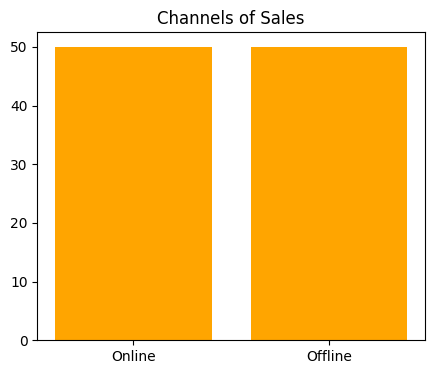

In [26]:
plt.figure(figsize =(5,4))
plt.title("Channels of Sales")
plt.bar(['Online',"Offline"],datafile['sales_channel'].value_counts(),color = 'orange')
plt.show()


**Finding the most ordered item by its type**

In [27]:
item_type_percentage= datafile['item_type'].value_counts(normalize = True)
item_type_percentage

item_type
Cosmetics          0.13
Clothes            0.13
Office Supplies    0.12
Fruits             0.10
Personal Care      0.10
Household          0.09
Beverages          0.08
Cereal             0.07
Baby Food          0.07
Vegetables         0.06
Snacks             0.03
Meat               0.02
Name: proportion, dtype: float64

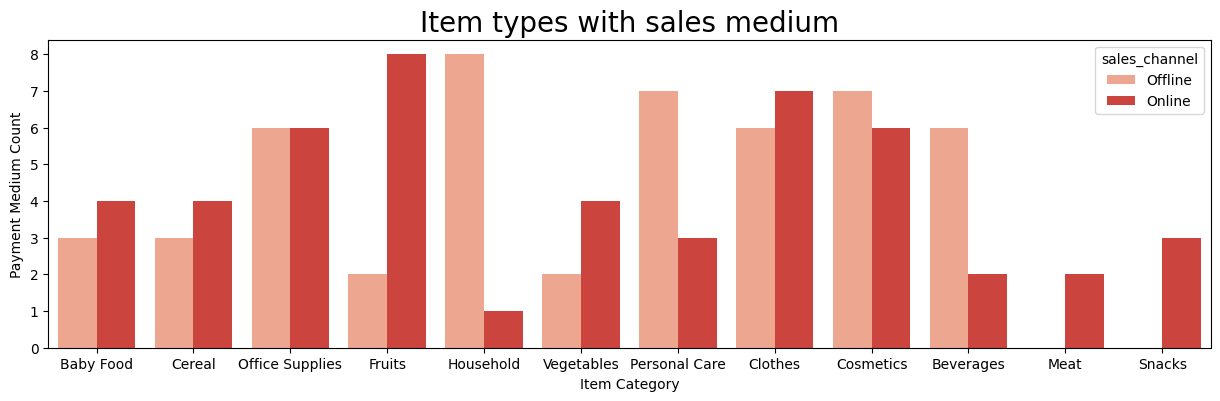

In [29]:
plt.figure(figsize = (15,4))
ax1 = sns.countplot(x='item_type',hue=datafile["sales_channel"],data=datafile,palette = "Reds")
plt.title("Item types with sales medium",size = 20)
plt.xlabel("Item Category")
plt.ylabel("Payment Medium Count")
plt.show()

In [30]:
top_regions = datafile['region'].value_counts(normalize = True)*100
top_regions

region
Sub-Saharan Africa                   36.0
Europe                               22.0
Australia and Oceania                11.0
Asia                                 11.0
Middle East and North Africa         10.0
Central America and the Caribbean     7.0
North America                         3.0
Name: proportion, dtype: float64

In [31]:
sub_prices = ['units_sold',
       'unit_price', 'unit_cost', 'total_revenue', 'total_cost',
       'total_profit', 'profit_margin',
       'gross_profit_per_user']

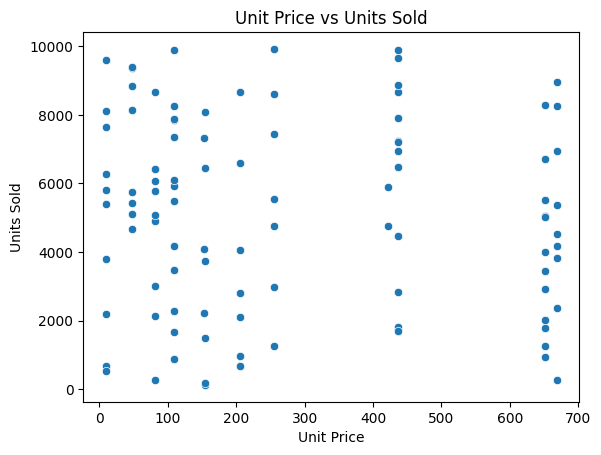

In [32]:
sns.scatterplot(x='unit_price',y='units_sold',data=datafile)
plt.title("Unit Price vs Units Sold")
plt.xlabel("Unit Price")
plt.ylabel("Units Sold")
plt.show()

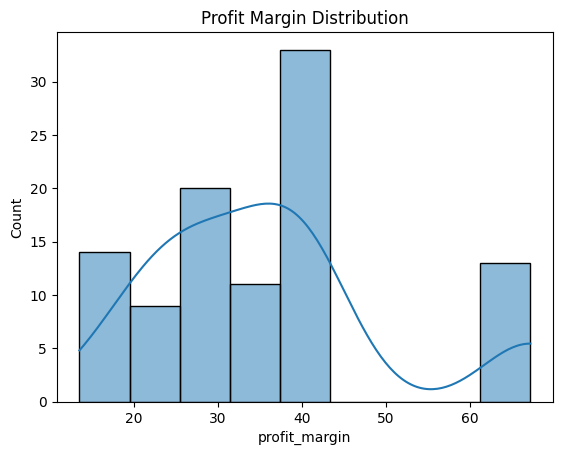

In [33]:
sns.histplot(datafile['profit_margin'],kde=True)
plt.title("Profit Margin Distribution")
plt.show()

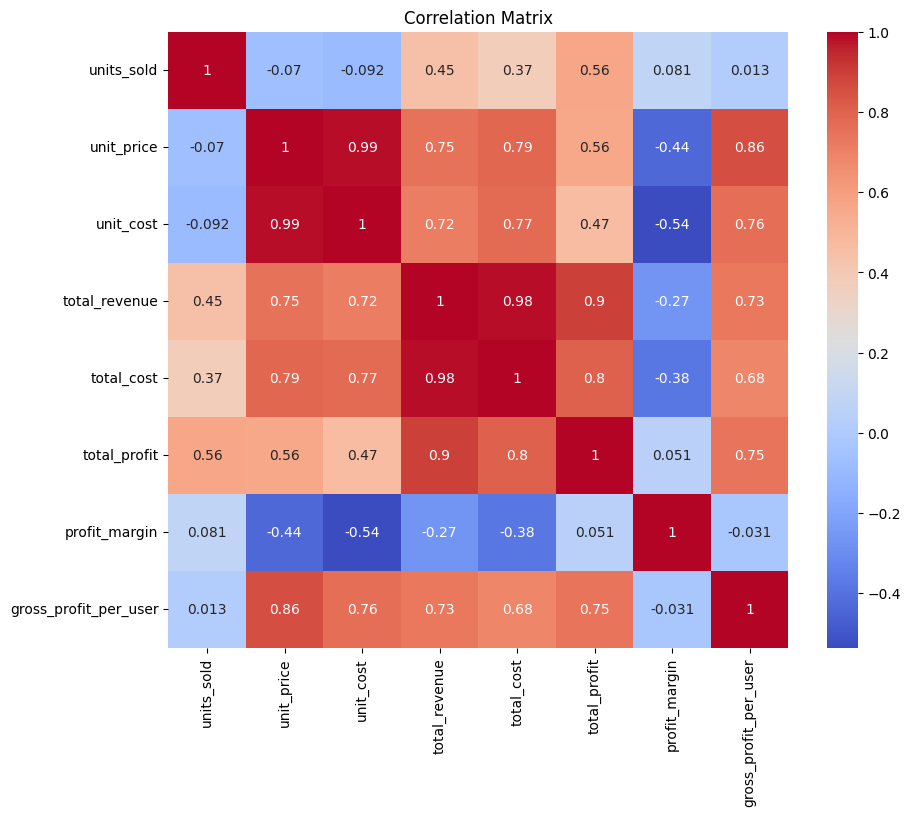

In [34]:
plt.figure(figsize=(10,8))
correlation_matrix = datafile[sub_prices].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


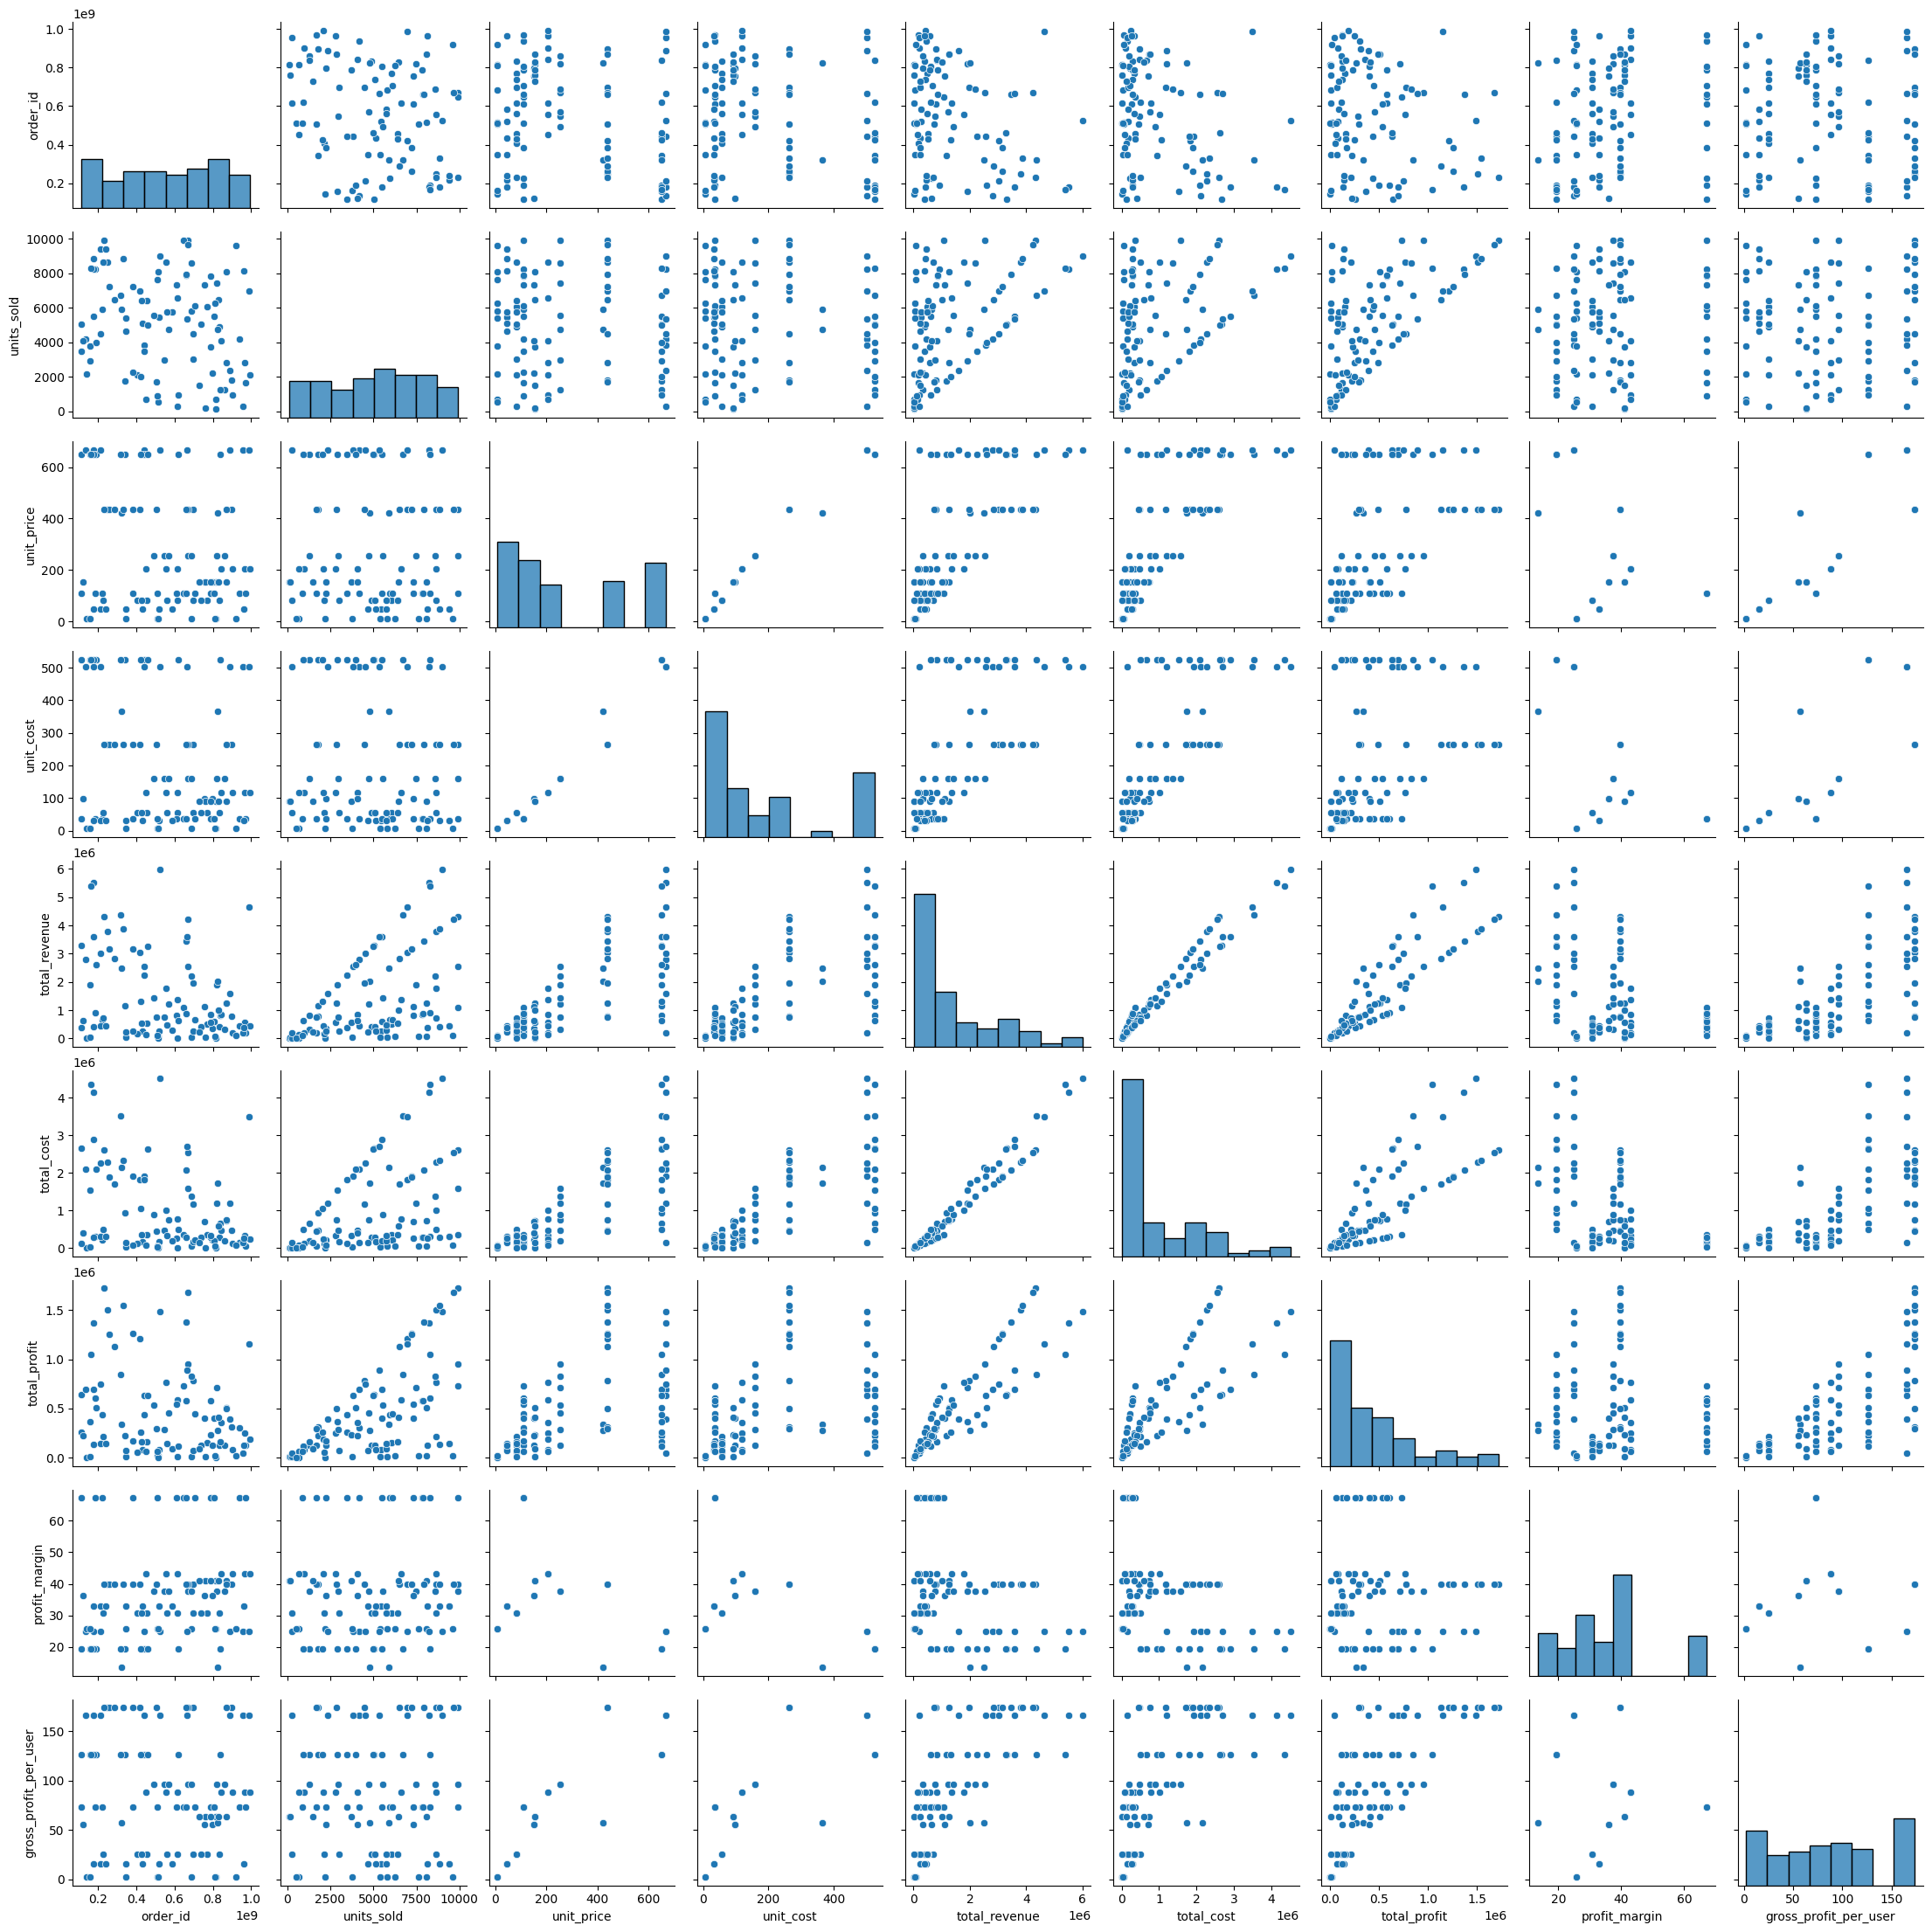

In [35]:
sns.pairplot(datafile)

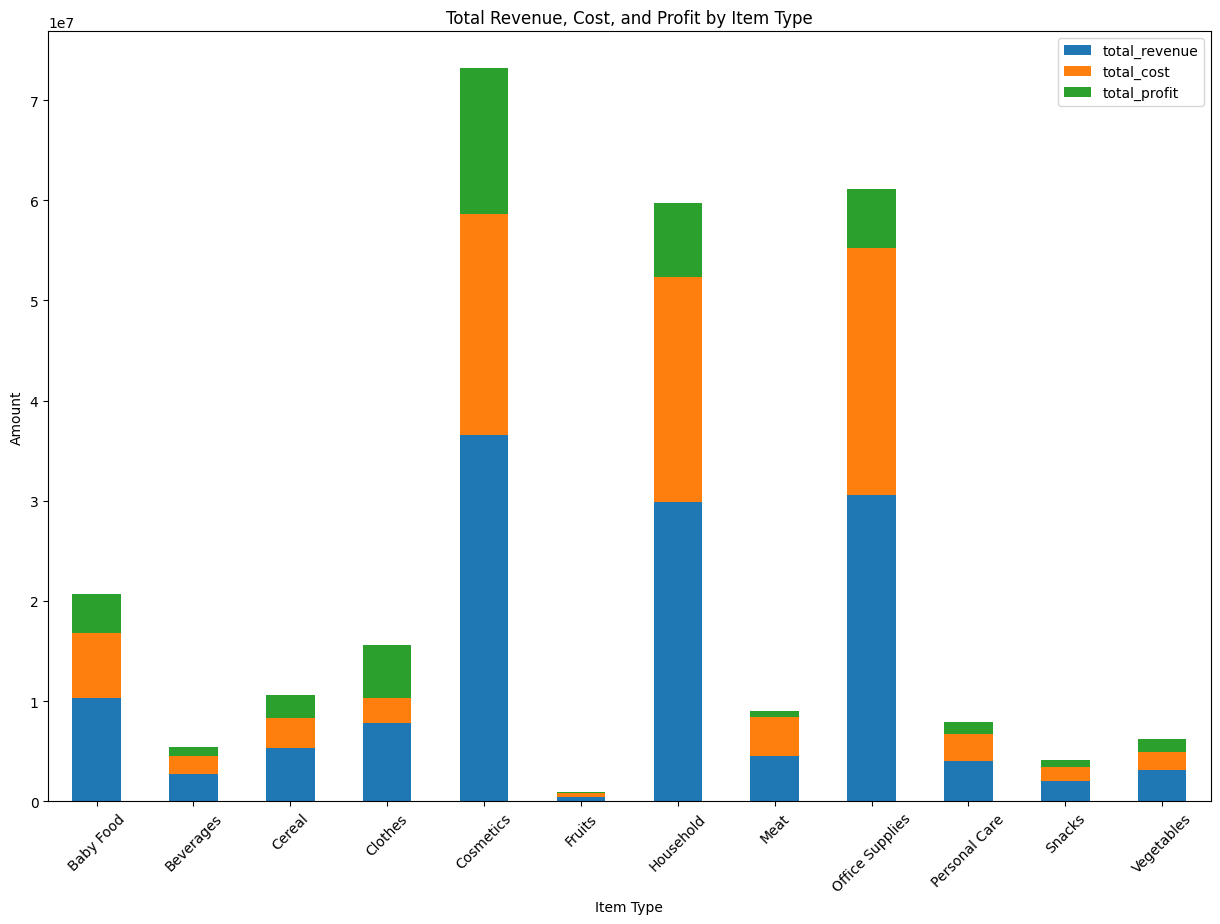

In [36]:
grouped_data = datafile.groupby('item_type')[['total_revenue', 'total_cost', 'total_profit']].sum()
grouped_data.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.xlabel('Item Type')
plt.ylabel('Amount')
plt.title('Total Revenue, Cost, and Profit by Item Type')
plt.xticks(rotation=45)
plt.show()

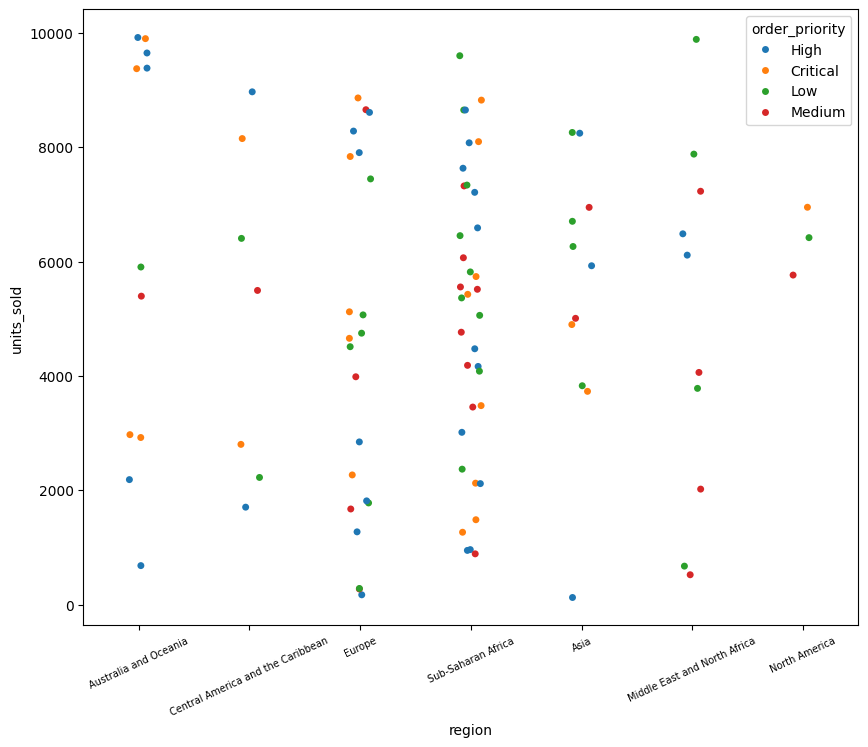

In [37]:
plt.figure(figsize=(10,8))
sns.stripplot(x='region',y='units_sold',data=datafile,jitter=True,hue='order_priority')
plt.xticks(rotation=25,fontsize=7)
plt.show()

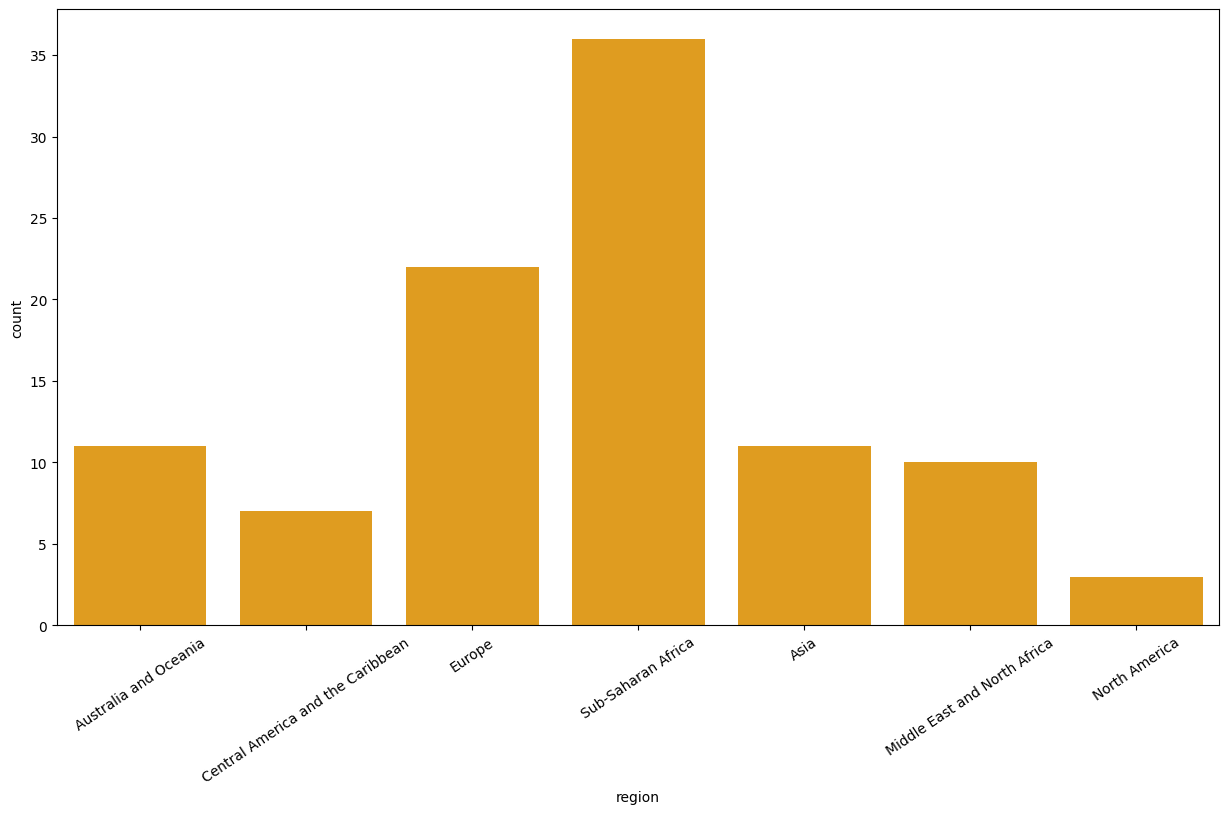

In [40]:
plt.figure(figsize=(15,8))
sns.countplot(x='region',data=datafile,color='orange')
plt.xticks(rotation=34)
plt.show()

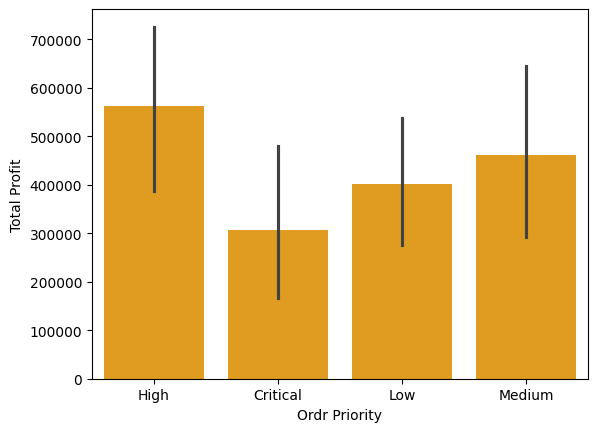

In [46]:
sns.barplot(x='order_priority',y='total_profit',data=datafile,color='orange')
plt.xlabel("Ordr Priority")
plt.ylabel("Total Profit")
plt.show()

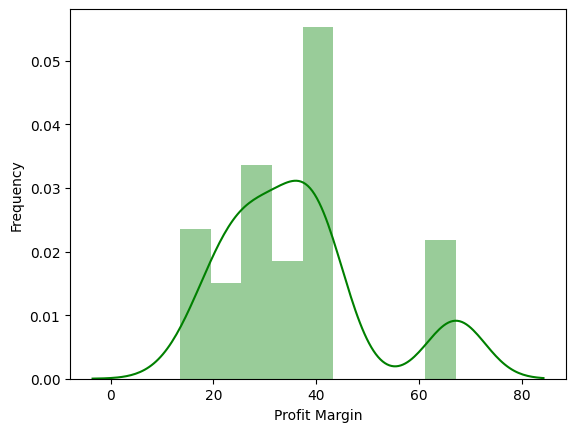

In [44]:
sns.distplot(datafile['profit_margin'],kde=True,color ="green")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.show()

In [53]:
plt.hist(data1['Total Revenue'])

NameError: name 'data1' is not defined